### Overview of Bagging and Random Forests

#### **Bagging (Bootstrap Aggregating)**
- **Definition**: Bagging is an ensemble learning method that trains multiple models (usually decision trees) on different random subsets of the training data, and then aggregates their predictions.
- **How it Works**:
  1. Create multiple bootstrap samples (random subsets with replacement).
  2. Train a base model (e.g., decision tree) on each sample.
  3. Aggregate predictions using majority voting (classification) or averaging (regression).
- **Advantages**:
  - Reduces variance and overfitting.
  - Works well with high-variance models like decision trees.
- **Disadvantages**:
  - May not improve model performance if base models are weak.
  - Less interpretable.

#### **Random Forests**
- **Definition**: Random Forests are a specific type of bagging that uses decision trees as base models. It adds extra randomness by selecting a random subset of features at each split in the decision tree.
- **How it Works**:
  1. Create bootstrap samples of the data.
  2. Randomly select features for each split in the decision tree.
  3. Train multiple decision trees and aggregate their predictions using majority voting.
- **Advantages**:
  - Reduces both variance and bias.
  - More robust than individual decision trees.
- **Disadvantages**:
  - Computationally expensive.
  - Less interpretable due to the large number of trees.

---

### Comparison of Bagging and Random Forests

- **Base Model**: Both use decision trees, but Random Forests add randomness by selecting random features at each split.
- **Feature Selection**: Bagging uses all features, while Random Forests randomly select a subset of features at each node.
- **Performance**: Random Forests usually perform better due to increased diversity among trees.
- **Overfitting**: Random Forests reduce overfitting more effectively due to random feature selection.
- **Computation**: Random Forests are more computationally expensive due to additional randomness and more trees.
- **Interpretability**: Bagging is easier to interpret compared to Random Forests, which are more complex.
- **Performance Comparison**: In the following sections, we will explore the performance differences of Bagging and Random Forests on the **Breast Cancer Wisconsin dataset**.

---

### Overview of the Breast Cancer Wisconsin Dataset

The **Breast Cancer Wisconsin dataset** is a classic dataset in machine learning, used for binary classification tasks (malignant vs benign). It contains 30 features computed from digitized images of breast cancer biopsies, including attributes like texture, smoothness, and compactness. The goal is to predict whether a tumor is malignant (1) or benign (0).

- **Features**: 30 numeric features representing various characteristics of the tumor.
- **Target**: A binary label indicating whether the tumor is malignant (1) or benign (0).
- **Instances**: 569 instances (rows).
- **Classes**: 2 classes – benign (0) and malignant (1).

We will use this dataset to train and evaluate both **Bagging** and **Random Forests** models and compare their performance in terms of accuracy, interpretability, and computational cost.


In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data  # Features
y = data.target  # Labels (0 = Benign, 1 = Malignant)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data (important for many algorithms)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [2]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize a Decision Tree classifier
base_model = DecisionTreeClassifier(random_state=42)

# Initialize the BaggingClassifier
bagging = BaggingClassifier(base_model, n_estimators=50, random_state=42)

# Train the Bagging model
bagging.fit(X_train, y_train)

# Predict on the test set
y_pred_bagging = bagging.predict(X_test)

# Evaluate the model
bagging_accuracy = accuracy_score(y_test, y_pred_bagging)
print(f"Bagging Model Accuracy: {bagging_accuracy:.4f}")


Bagging Model Accuracy: 0.9561


In [3]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=50, random_state=42)

# Train the Random Forest model
random_forest.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = random_forest.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Model Accuracy: {rf_accuracy:.4f}")


Random Forest Model Accuracy: 0.9649


In [4]:
print(f"Bagging Accuracy: {bagging_accuracy:.4f}")
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")


Bagging Accuracy: 0.9561
Random Forest Accuracy: 0.9649


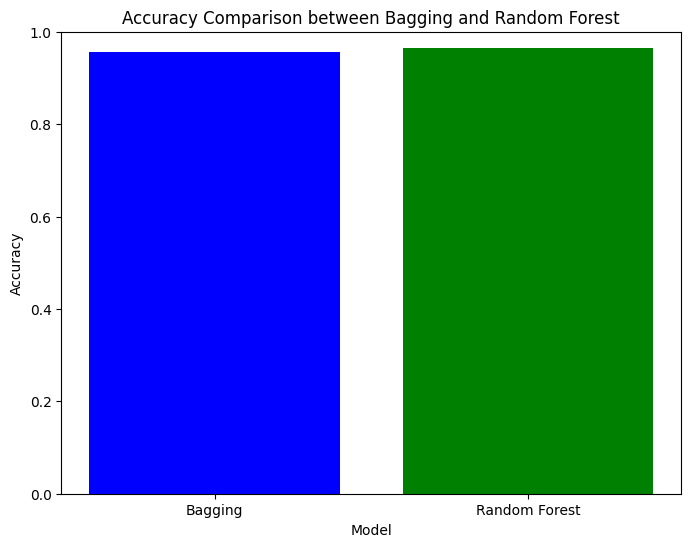

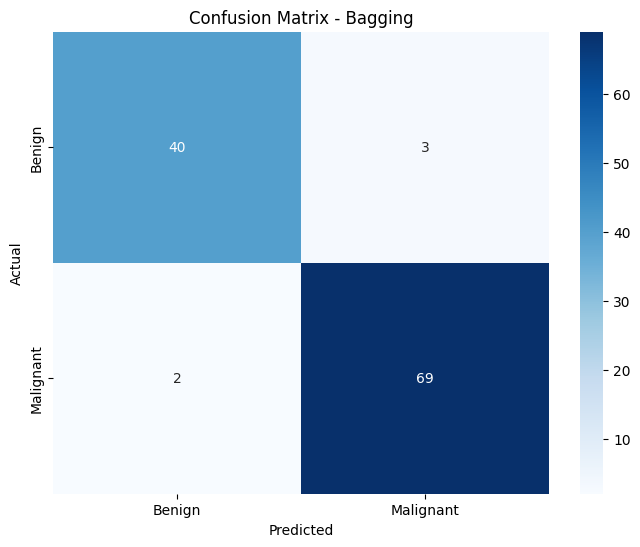

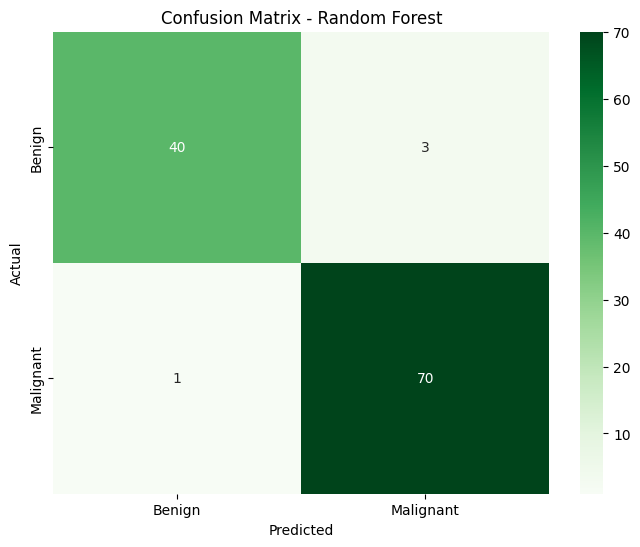

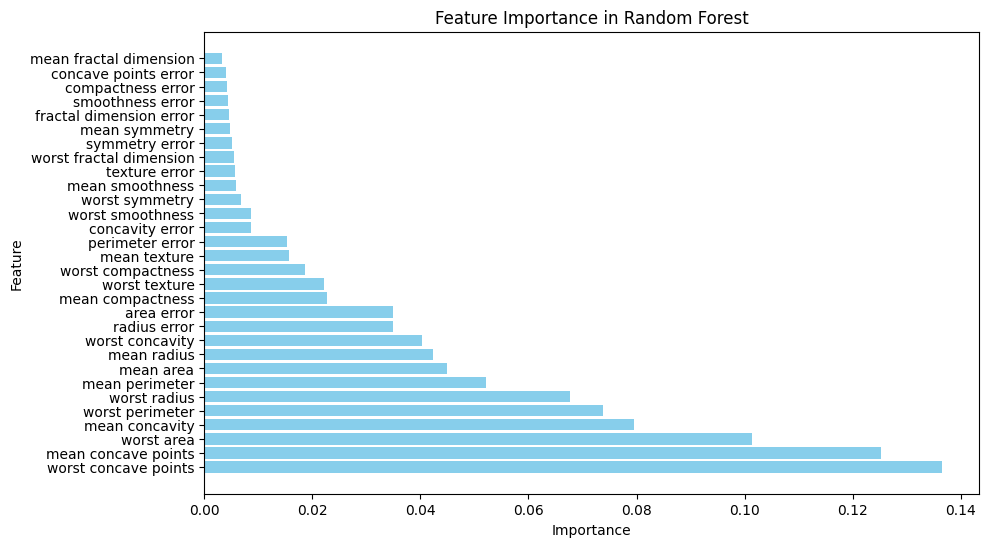

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

# --- 1. Accuracy Comparison Bar Chart ---
models = ['Bagging', 'Random Forest']
accuracies = [bagging_accuracy, rf_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green'])
plt.title('Accuracy Comparison between Bagging and Random Forest')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

# --- 2. Confusion Matrix ---
# Bagging Confusion Matrix
cm_bagging = confusion_matrix(y_test, y_pred_bagging)
# Random Forest Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix for Bagging
plt.figure(figsize=(8, 6))
sns.heatmap(cm_bagging, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix - Bagging')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot confusion matrix for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# --- 3. Feature Importance Visualization (Random Forest only) ---
# Extracting feature importances
importances = random_forest.feature_importances_
features = data.feature_names

# Create a bar plot of the feature importances
indices = np.argsort(importances)[::-1]  # Sort features by importance
plt.figure(figsize=(10, 6))
plt.barh(features[indices], importances[indices], color='skyblue')
plt.title('Feature Importance in Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


### Conclusions and Comparison

#### **Accuracy Comparison**
- **Random Forest** slightly outperforms **Bagging** in terms of accuracy, demonstrating the added benefit of random feature selection at each split.

#### **Confusion Matrix Analysis**
- **Bagging**:
  - 40 true positives (benign), 69 true negatives (malignant), 3 false positives, and 2 false negatives.
- **Random Forest**:
  - 40 true positives (benign), 70 true negatives (malignant), 3 false positives, and 1 false negative.
- **Random Forest** has fewer misclassifications, especially false negatives.

#### **Feature Importance**
- Key features identified by **Random Forest**: `mean concave points`, `worst concave points`, and `mean fractal dimension`. These features are critical for accurate classification.

#### **Overall Performance Comparison**
- **Random Forest** provides better performance in accuracy and fewer misclassifications compared to **Bagging**. It also offers insights into feature importance, which is useful for understanding the model's decision-making process.
